In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import tensorflow as tf
tf.config.run_functions_eagerly(True)
import matplotlib.pyplot as plot
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from keras.callbacks import Callback

In [ ]:
from google.colab import files
uploaded=files.upload()

In [2]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()
tf_data=tf.data.Dataset.from_tensor_slices((x_train,y_train))
tf_data=tf_data.map(lambda feature,label:(feature/255,tf.one_hot(label,depth=10)))

11490434/11490434 [==============================] - 1s 0us/step


/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


DATA VISUALIZATION


Text(0, 0.5, 'Number of Digits in Dataset')

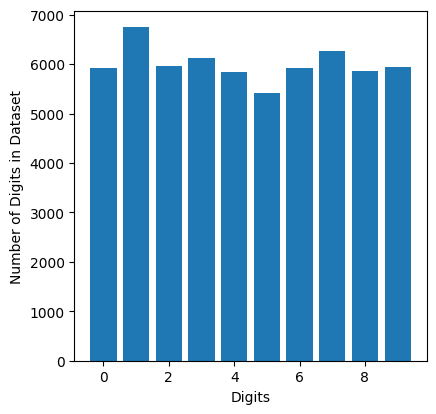

In [ ]:
arr=np.full((10,),0)
for i in y_train:
  arr[i]=arr[i]+1
fig=plot.figure(figsize=(10,10))
plt=fig.add_subplot(2,2,1)
plt.bar(np.arange(0,10),arr)
plt.set_xlabel('Digits')
plt.set_ylabel('Number of Digits in Dataset')

DIGIT ZERO

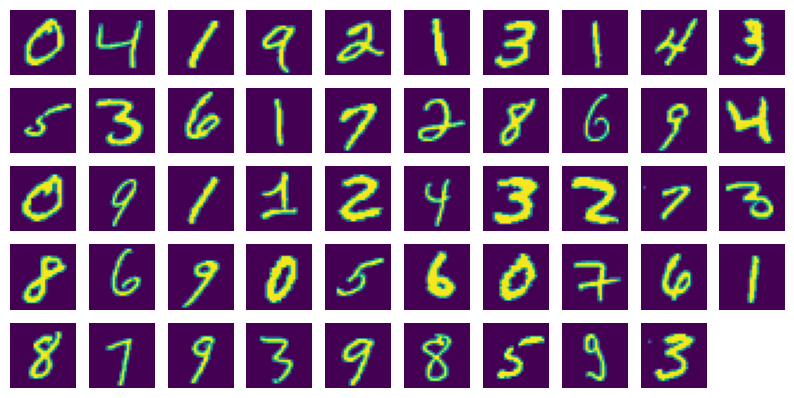

In [ ]:
fig=plot.figure(figsize=(10,10))
for i in range(1,50):
  ax=fig.add_subplot(10,10,i)
  ax.imshow(np.array(x_train[i]).reshape(28,28))
  ax.set_axis_off()

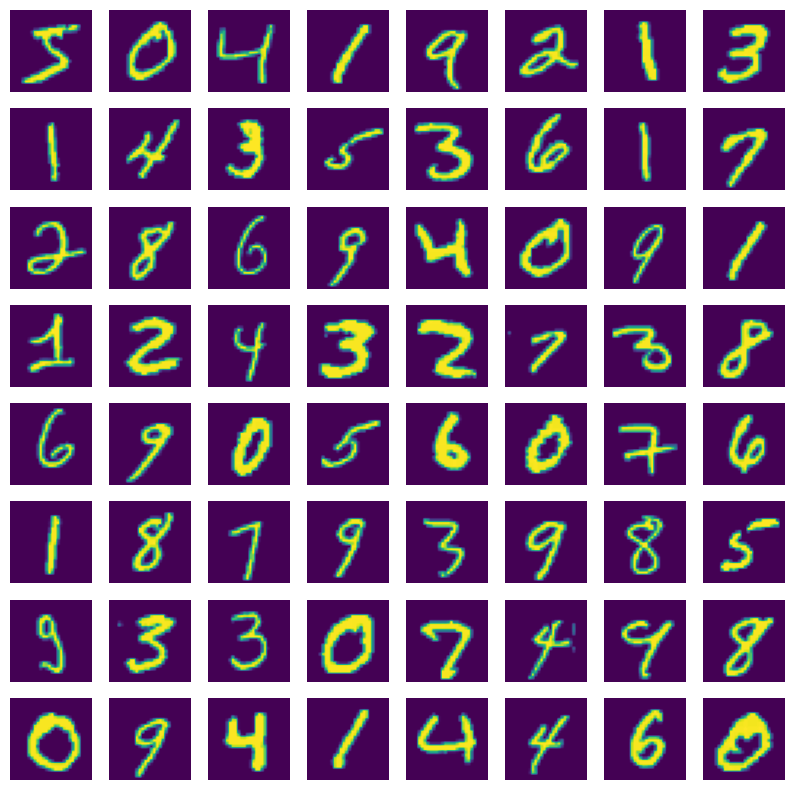

In [ ]:
fig,axes=plot.subplots(8,8,figsize=(10,10))
for i,ax in enumerate(axes.flat):
  ax.imshow(np.array(x_train[i]).reshape(28,28))
  ax.set_axis_off()

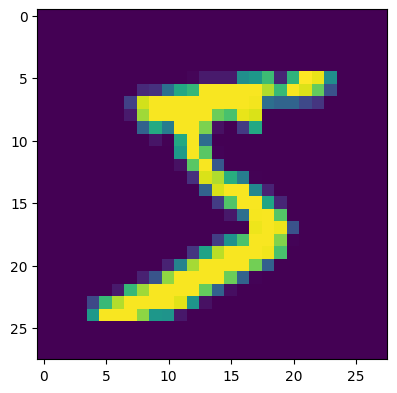

In [ ]:
fig=plot.figure(figsize=(10,10))
splt=fig.add_subplot(2,2,1)
splt.imshow(x_train[0])

In [ ]:
a_arr,a_res=next(iter(tf_data))
a_arr=a_arr.numpy().reshape(1,-1)
print(a_arr.shape)
plt.imshow(a_arr.reshape(28,28))

(1, 784)


THIS IS THE DATASET FROM SKLEARN

In [ ]:
#this is for another data set to make tf_data to train our model
datas=load_digits()
x=datas['data']
y=datas['target']
tf_data=tf.data.Dataset.from_tensor_slices((x,y))
print("Before One hot Encoding")
for feature,label in tf_data.take(1):
  print("feature",feature)
  print("\n label",label)
tf_data=tf_data.map(lambda feature,label: (tf.expand_dims(feature/255,axis=0),tf.reshape(tf.one_hot(label,depth=10),(1,-1))))
print("\n\n\nAfter One hot Encoding")
for feature,label in tf_data.take(1):
  print("feature",feature)
  print("\n label",label)

MODEL


In [3]:
model=keras.models.Sequential([
    keras.layers.Reshape((28,28,1),input_shape=(28,28)),
    keras.layers.Conv2D(16,(3,3),activation='relu'),
    keras.layers.MaxPooling2D((3,3)),
    keras.layers.Conv2D(16,(3,3),activation='relu'),
    keras.layers.MaxPooling2D((3,3)),
    keras.layers.Flatten(),
    keras.layers.Dense(32,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    keras.layers.Dense(10,activation='softmax')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 28, 28, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 8, 8, 16)          0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 6, 6, 16)          2320      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 2, 2, 16)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 64)                0

In [4]:
class model_log(Callback):
  def __init__(self,x_val,y_val):
    super(model_log, self).__init__()
    self.loss = []
    self.val_loss = []
    self.acc = []
    self.val_acc = []
    self.x_val=x_val
    self.y_val=y_val
  def on_batch_end(self, batch, logs={}):
    val_loss,val_acc=self.model.evaluate(self.x_val,self.y_val)
    self.loss.append(logs.get('loss'))
    self.acc.append(logs.get('accuracy'))
    self.val_loss.append(val_loss)
    self.val_acc.append(val_acc)

In [ ]:
model_history=model_log(x_test[:10],y_test[:10])
model.fit(x_train,y_train,epochs=1,batch_size=32,callbacks=[model_history])

In [6]:
print(np.array(model_history.loss))
print(model_history.val_acc)
print(model_history.acc)
print(model_history.val_loss)

[65.29024506 53.02192688 50.31339645 ...  0.26498228  0.35029191
  0.19305541]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.0, 0.0, 0.0, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.20000000298023224, 0.30000001192092896, 0.4000000059604645, 0.4000000059604645, 0.4000000059604645, 0.4000000059604645, 0.4000000059604645, 0.30000001192092896, 0.30000001192092896, 0.30000001192092896, 0.30000001192092896, 0.30000001192092896, 0.30000001192092896, 0.30000001192092896, 0.30000001192092896, 0.30000001192092896, 0.30000001192092896, 0.30000001192092896, 0.30000001192092896, 0.30000001192092896, 0.30000001192092896, 0.30000001192092896, 0.30000001192092896, 0.30000001192092896, 0.3000000

THIS IS FOR THE FIRST EPOCHS OF TRAINING

Text(0.5, 0, 'No of Dataset')

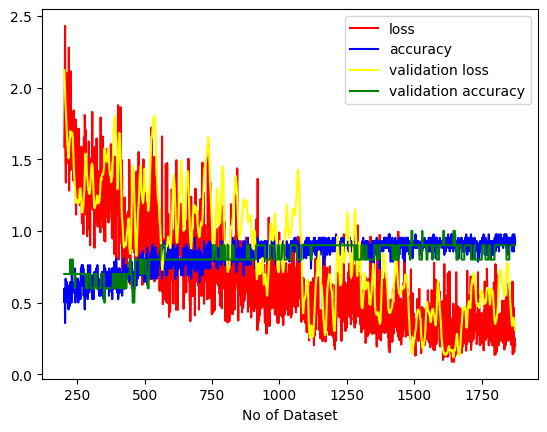

In [ ]:
n=1876
plot.plot(np.arange(1,n)[200:],model_history.loss[200:],color='red',label='loss',linestyle='-')
plot.plot(np.arange(1,n)[200:],model_history.acc[200:],color='blue',label='accuracy',linestyle='-')
plot.plot(np.arange(1,n)[200:],model_history.val_loss[200:],color='yellow',label='validation loss',linestyle='-')
plot.plot(np.arange(1,n)[200:],model_history.val_acc[200:],color='green',label='validation accuracy',linestyle='-')
plot.legend()
plot.xlabel('No of Dataset')

Text(0.5, 0, 'No of Dataset')

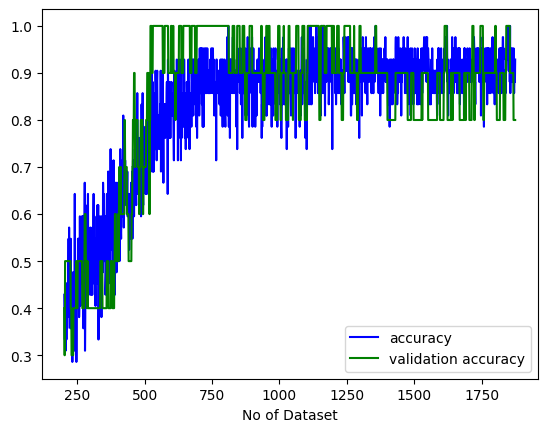

In [9]:
n=1876
plot.plot(np.arange(1,n)[200:],model_history.acc[200:],color='blue',label='accuracy',linestyle='-')
plot.plot(np.arange(1,n)[200:],model_history.val_acc[200:],color='green',label='validation accuracy',linestyle='-')
plot.legend()
plot.xlabel('No of Dataset')

THIS IS SECOND EPOCHS OF TRANING

Text(0.5, 0, 'No of Dataset')

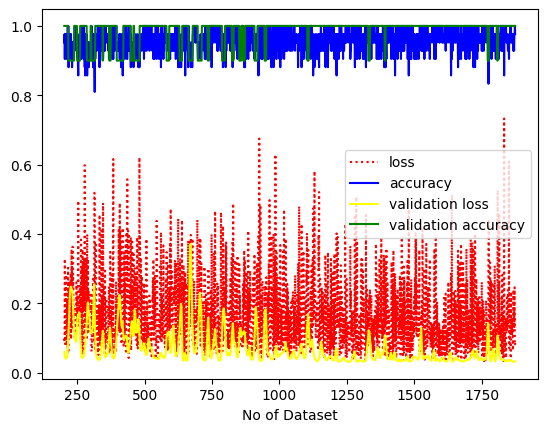

In [ ]:
n=1876
plot.plot(np.arange(1,n)[200:],model_history.loss[200:],color='red',label='loss',linestyle='dotted')
plot.plot(np.arange(1,n)[200:],model_history.acc[200:],color='blue',label='accuracy',linestyle='-')
plot.plot(np.arange(1,n)[200:],model_history.val_loss[200:],color='yellow',label='validation loss',linestyle='-')
plot.plot(np.arange(1,n)[200:],model_history.val_acc[200:],color='green',label='validation accuracy',linestyle='-')
plot.legend()
plot.xlabel('No of Dataset')

THIS IS FOR THIRD EPOCHS OF TRAINING

Text(0.5, 0, 'No of Dataset')

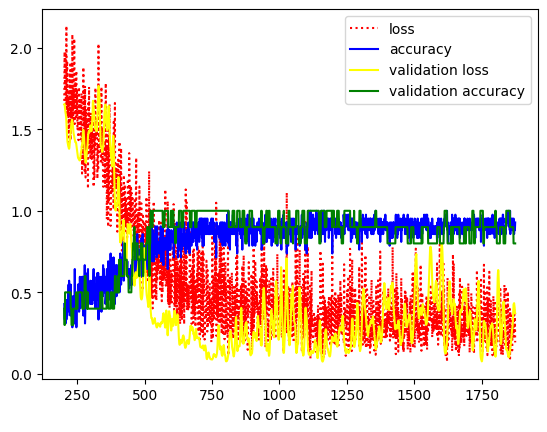

In [7]:
n=1876
plot.plot(np.arange(1,n)[200:],model_history.loss[200:],color='red',label='loss',linestyle='dotted')
plot.plot(np.arange(1,n)[200:],model_history.acc[200:],color='blue',label='accuracy',linestyle='-')
plot.plot(np.arange(1,n)[200:],model_history.val_loss[200:],color='yellow',label='validation loss',linestyle='-')
plot.plot(np.arange(1,n)[200:],model_history.val_acc[200:],color='green',label='validation accuracy',linestyle='-')
plot.legend()
plot.xlabel('No of Dataset')

In [8]:
def kernel_properties(x,y,layers):
  weights1=layers.get_weights()
  for i in range(16):
    kernel=weights1[0][:,:,:,i:i+1].reshape(3,3)
    bias=tf.constant([weights1[1][i]])
    output_b=tf.nn.conv2d(
        input=tf.cast(tf.constant(x.reshape(1,28,28,1)),tf.float32),
        filters=tf.reshape(tf.constant(kernel),[3,3,1,1]),
        strides=[1,1,1,1],
        padding='VALID',
    )
    output=tf.keras.activations.relu(tf.nn.bias_add(output_b,bias))
    plot.subplot(8,8,i*2+1)
    plot.imshow(output.numpy().reshape(26,-1))
    plot.xticks([])
    plot.yticks([])
    plot.subplot(8,8,i*2+2)
    plot.imshow(kernel)
    plot.xticks([])
    plot.yticks([])
  print(np.argmax(np.array(model.predict(x.reshape(1,28,28,1)))))
  print("loss: ",findloss(x,y))

THIS IS FOR FIRST CONVOLUTIONAL LAYER

1/1 [==============================] - 0s 41ms/step
5
1/1 [==============================] - 0s 42ms/step
loss:  1.244037903802564e-07


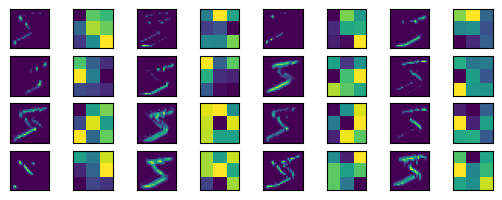

In [ ]:
kernel_properties(x_train[0],y_train[0],model.layers[1])

313/313 [==============================] - 5s 15ms/step

Accuracy:  0.9695

Loss:  11.21008


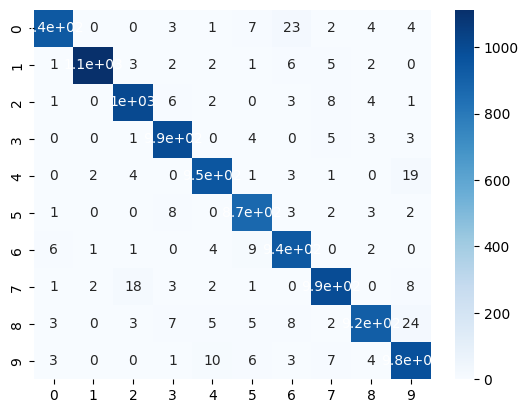

In [ ]:
pred=model.predict(x_test)
prediction=[np.argmax(data) for data in pred]


cat_y=np.array([1 if e==i else 0 for i in range(10) for e in y_test])
cat_y=cat_y.reshape(int(y_test.shape[0]),-1)



cf=tf.math.confusion_matrix(labels=y_test,predictions=prediction)
sns.heatmap(data=cf,annot=True,cmap='Blues')
print("\nAccuracy: ",tf.reduce_sum(tf.linalg.tensor_diag_part(cf)/tf.reduce_sum(cf)).numpy())
print("\nLoss: ",(tf.reduce_sum(tf.keras.losses.categorical_crossentropy(cat_y, pred))/cat_y.shape[0]).numpy())

In [ ]:
x=np.array([x for x,y in zip(x_train,y_train) if y==2 ])
predict=[np.argmax(element) for element in model.predict(x)]
cv=tf.math.confusion_matrix(labels=np.full(np.array(predict).shape,2),predictions=predict)

187/187 [==============================] - 2s 12ms/step


<Axes: >

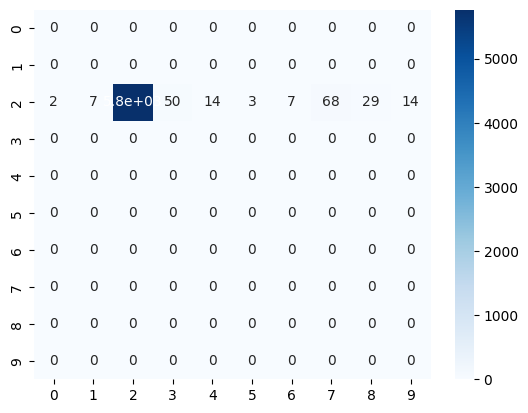

In [ ]:
import seaborn as sns
sns.heatmap(cv,cmap='Blues',annot=True)

TESTING OUR MODEL WITH REAL IMAGE


In [ ]:
from PIL import Image
img=Image.open('five.jpeg').resize((28,28))
test=np.array([np.sum(element)/(3) for element in np.array(img.getdata())]).reshape(1,28,28)
test=255-test
predict=np.argmax(model.predict(test))
print(tf.keras.activations.softmax(tf.constant(model.predict(255-test))))
print(predict)

1/1 [==============================] - 0s 58ms/step
tf.Tensor(
[[0.09172235 0.08918747 0.08933411 0.08919034 0.08926143 0.10967031
  0.14838405 0.08918297 0.11485097 0.08921601]], shape=(1, 10), dtype=float32)
5


1/1 [==============================] - 0s 30ms/step
5
1/1 [==============================] - 0s 28ms/step
loss:  -3.180886458745147e-08


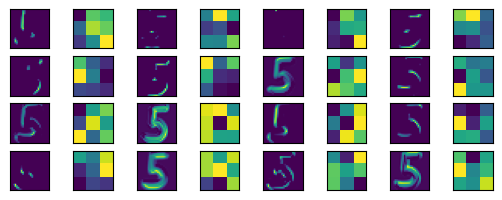

In [ ]:
kernel_properties(test,5,model.layers[1])

In [ ]:
from PIL import Image
img=Image.open('zero.jpeg').resize((28,28))
test=np.array([np.sum(element)/(3) for element in np.array(img.getdata())]).reshape(1,28,28)
predict=np.argmax(model.predict(255-test))
print(tf.keras.activations.softmax(tf.constant(model.predict(255-test))))
print(predict)

1/1 [==============================] - 0s 32ms/step
tf.Tensor(
[[0.14130042 0.08939882 0.09157377 0.09049395 0.08949602 0.0894182
  0.08960905 0.10831143 0.09085547 0.11954295]], shape=(1, 10), dtype=float32)
0


In [ ]:
from PIL import Image
img=Image.open('six.jpeg').resize((28,28))
print(np.array(img.getdata()).shape)
test=np.array([np.sum(element)/(3) for element in np.array(img.getdata())]).reshape(1,28,28)
plot.imshow(test.reshape(28,28))
predict=np.argmax(model.predict(255-test))
print(tf.keras.activations.softmax(tf.constant(model.predict(255-test))))
print(predict)

In [ ]:
kernel_properties(test,6,model.layers[1])